In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
df = pd.read_csv("dataset.csv", index_col=0)

## Exploring the dataset

In [3]:
df

,Year,Item,Yield (tonnes/ha),Harvest (ha),Production (tonnes),Change (C),Annual Mean Precipitation,Air Temp Mean,Frost Days,Hot Days,...,Monthly Average,Devil,Gustnado,Hail,Ice,Precip,Snow,Tornado,Wind,Total
0,1980,Asparagus,2.2023,6381,14053.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
1,1980,Barley,4.3104,2970671,12804914.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
2,1980,"Broad beans and horse beans, green",10.4409,1016,10608.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
3,1980,Cabbages,29.6605,24663,731518.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
4,1980,Carrots and turnips,31.5252,13021,410490.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,2021,Sugar beet,81.7645,390700,31945400.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
1593,2021,Sunflower seed,2.6031,38300,99700.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
1594,2021,Tomatoes,254.4250,400,101770.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
1595,2021,Triticale,5.8136,328300,1908600.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002


In [4]:
crops = ['Wheat', 'Barley', 'Maize', 'Sugar beet', 'Potatoes', 'Rye', 'Rape', 'Apples', 'Grapes', 'Cabbages']
mask = df["Item"].str.contains("|".join(crops))
sample = df[mask]
sample.reset_index(drop=True, inplace=True)
sample

,Year,Item,Yield (tonnes/ha),Harvest (ha),Production (tonnes),Change (C),Annual Mean Precipitation,Air Temp Mean,Frost Days,Hot Days,...,Monthly Average,Devil,Gustnado,Hail,Ice,Precip,Snow,Tornado,Wind,Total
0,1980,Barley,4.3104,2970671,12804914.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
1,1980,Cabbages,29.6605,24663,731518.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
2,1980,Maize (corn),5.6435,119749,675807.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
3,1980,Potatoes,20.9328,819108,17146192.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
4,1980,Rape or colza seed,2.6132,262441,685801.0,-0.190,771.58,7.63,103.61,1.45,...,338.762500,0,0,6,0,8,1,27,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021,Potatoes,43.7944,258300,11312100.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
379,2021,Rape or colza seed,3.5014,1000900,3504600.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
380,2021,Rye,5.2704,631000,3325600.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002
381,2021,Sugar beet,81.7645,390700,31945400.0,1.304,772.58,9.16,89.36,4.53,...,416.450833,2,0,464,13,1535,186,40,3762,6002


In [5]:
crop_names = sample['Item'].unique()

# Create an empty DataFrame to store the correlations
correlations = pd.DataFrame(columns=['Item', 'Variable', 'Correlation'])

# Loop through each crop and compute the correlations with all variables
for crop in crop_names:
    crop_df = sample[sample['Item'] == crop]
    for variable in crop_df.columns:
        if variable != 'Item' and variable != 'Yield (tonnes/ha)':
            correlation = crop_df[variable].corr(crop_df['Yield (tonnes/ha)'])
            corr = {'Item': [crop], 'Variable': [variable], 'Correlation': [correlation]}
            df_corr = pd.DataFrame(data=corr)
            correlations = pd.concat([correlations, df_corr], ignore_index=True)
            #correlations = correlations.append({'Item': crop, 'Variable': variable, 'Correlation': correlation}, ignore_index=True)
 

In [6]:
correlations

,Item,Variable,Correlation
0,Barley,Year,0.867135
1,Barley,Harvest (ha),-0.853983
2,Barley,Production (tonnes),-0.352074
3,Barley,Change (C),0.572006
4,Barley,Annual Mean Precipitation,-0.151337
...,...,...,...
215,Grapes,Precip,-0.422296
216,Grapes,Snow,-0.585361
217,Grapes,Tornado,-0.289098
218,Grapes,Wind,-0.551716


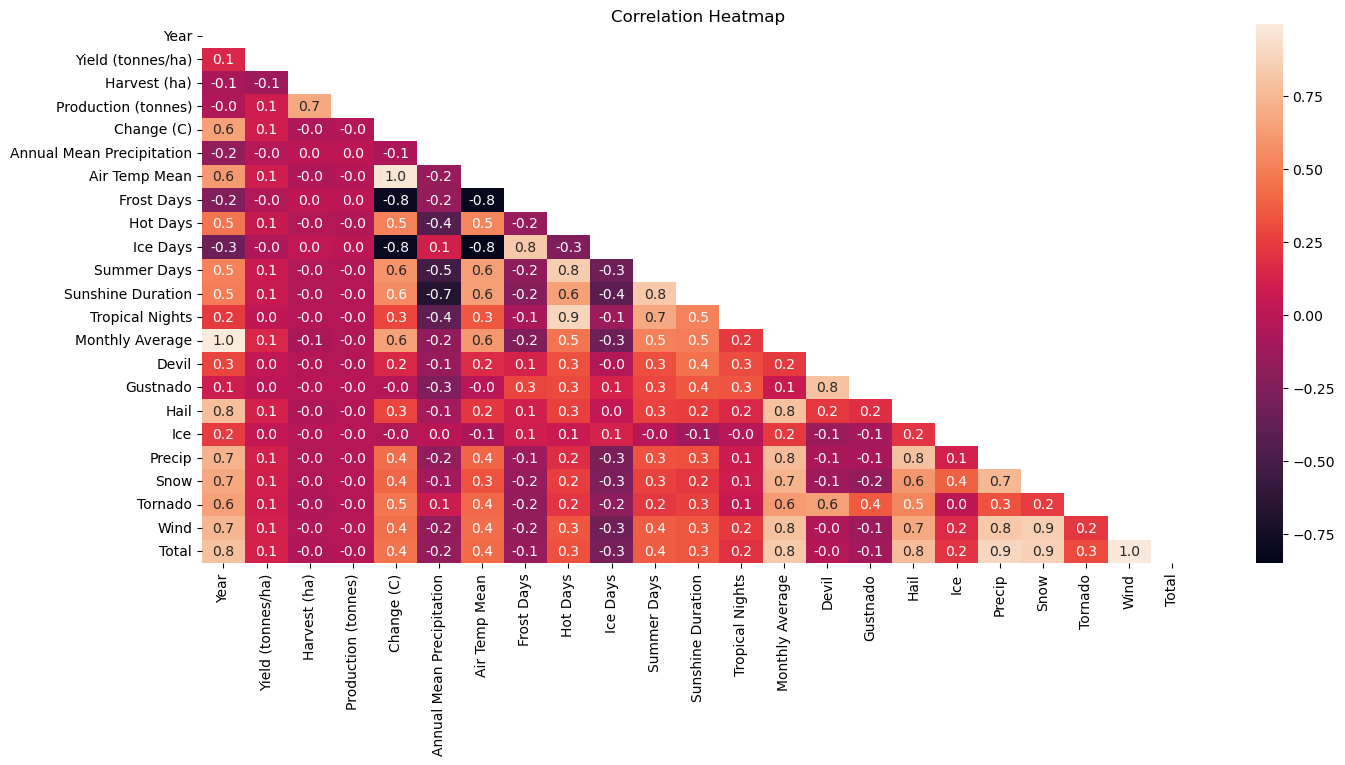

In [7]:
plt.figure(figsize=(16, 7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(method='pearson'), mask=mask, annot=True, fmt=".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1);
plt.show()

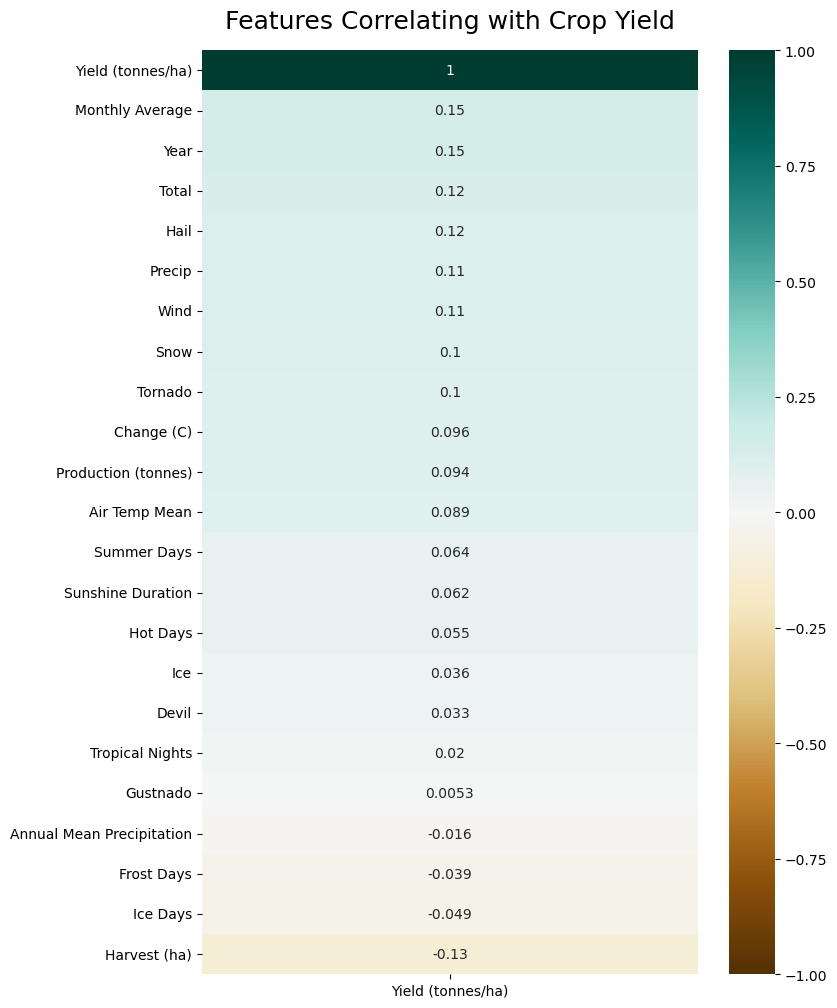

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Yield (tonnes/ha)']].sort_values(by='Yield (tonnes/ha)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Crop Yield', fontdict={'fontsize':18}, pad=16);

In [9]:
appl = df[df["Item"] == "Apples"]
appl

,Year,Item,Yield (tonnes/ha),Harvest (ha),Production (tonnes),Change (C),Annual Mean Precipitation,Air Temp Mean,Frost Days,Hot Days,...,Monthly Average,Devil,Gustnado,Hail,Ice,Precip,Snow,Tornado,Wind,Total
310,1991,Apples,19.9184,39200,780800.0,0.279,604.17,8.35,92.48,5.27,...,355.704167,0,0,1,0,11,0,3,14,29
347,1992,Apples,35.1480,39200,1377800.0,1.220,735.03,9.37,71.53,9.64,...,356.545833,0,0,11,0,13,0,8,68,100
385,1993,Apples,22.5102,39200,882400.0,0.304,793.47,8.47,88.00,1.89,...,357.215000,0,0,13,0,19,0,8,21,61
425,1994,Apples,24.1621,36400,879500.0,1.618,789.20,9.70,59.90,16.27,...,358.959167,1,0,8,0,9,0,12,19,49
464,1995,Apples,15.8809,36100,573300.0,1.301,781.44,8.90,91.57,10.54,...,360.968333,0,0,3,0,17,1,10,13,44
501,1996,Apples,24.1236,36400,878100.0,-0.706,622.39,7.20,118.69,3.00,...,362.743333,0,0,2,1,7,0,7,8,25
536,1997,Apples,21.3575,35800,764600.0,0.551,665.63,8.89,88.99,5.16,...,363.877500,2,0,9,0,9,1,17,31,69
576,1998,Apples,27.2961,35800,977200.0,1.146,808.89,9.06,74.83,7.08,...,366.840000,0,0,70,0,12,0,36,24,142
616,1999,Apples,28.9413,35800,1036100.0,1.360,768.89,9.49,73.08,5.16,...,368.540000,3,0,14,0,13,1,33,74,138
656,2000,Apples,25.0944,125000,3136800.0,1.755,757.74,9.87,55.14,5.67,...,369.707500,3,0,26,0,18,0,49,29,125


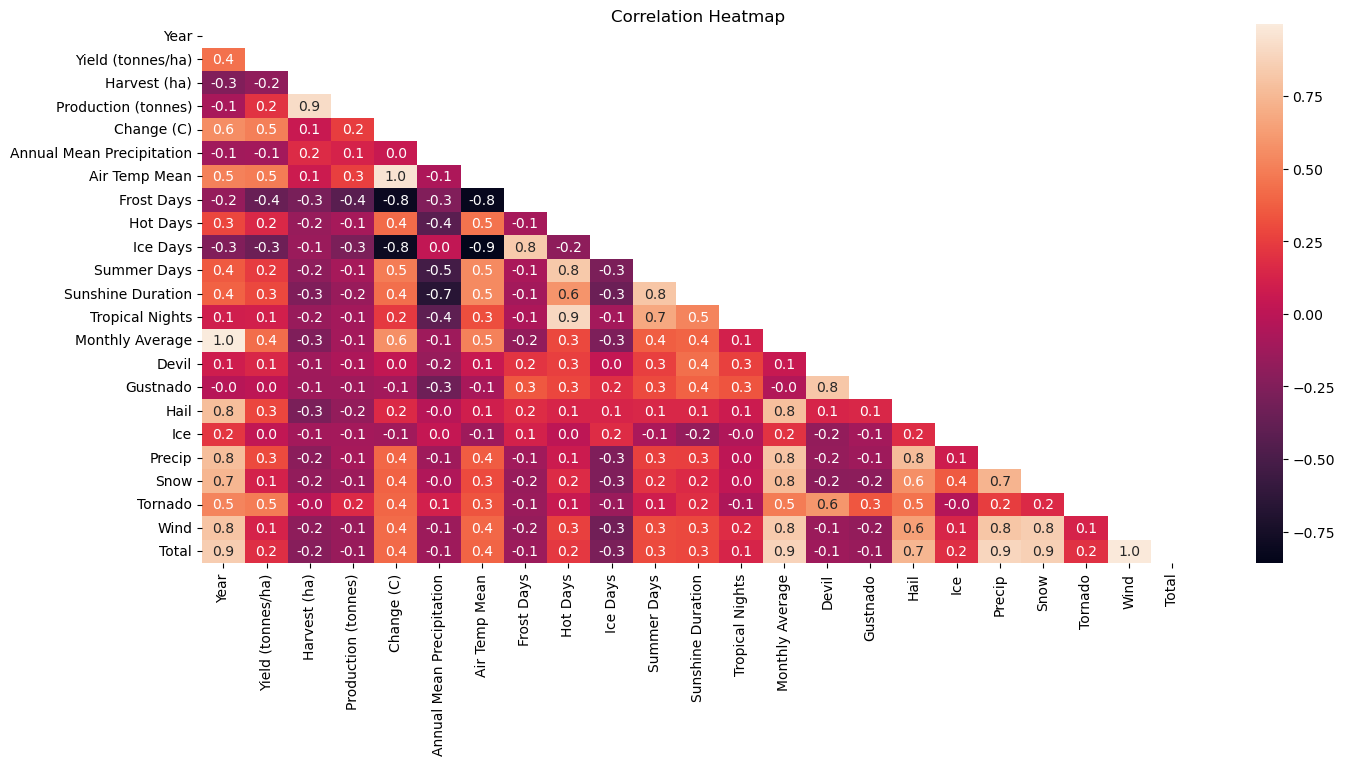

In [10]:
plt.figure(figsize=(16, 7))
mask = np.triu(np.ones_like(appl.corr(), dtype=bool))
heatmap = sns.heatmap(appl.corr(method='pearson'), mask=mask, annot=True, fmt=".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1);
plt.show()

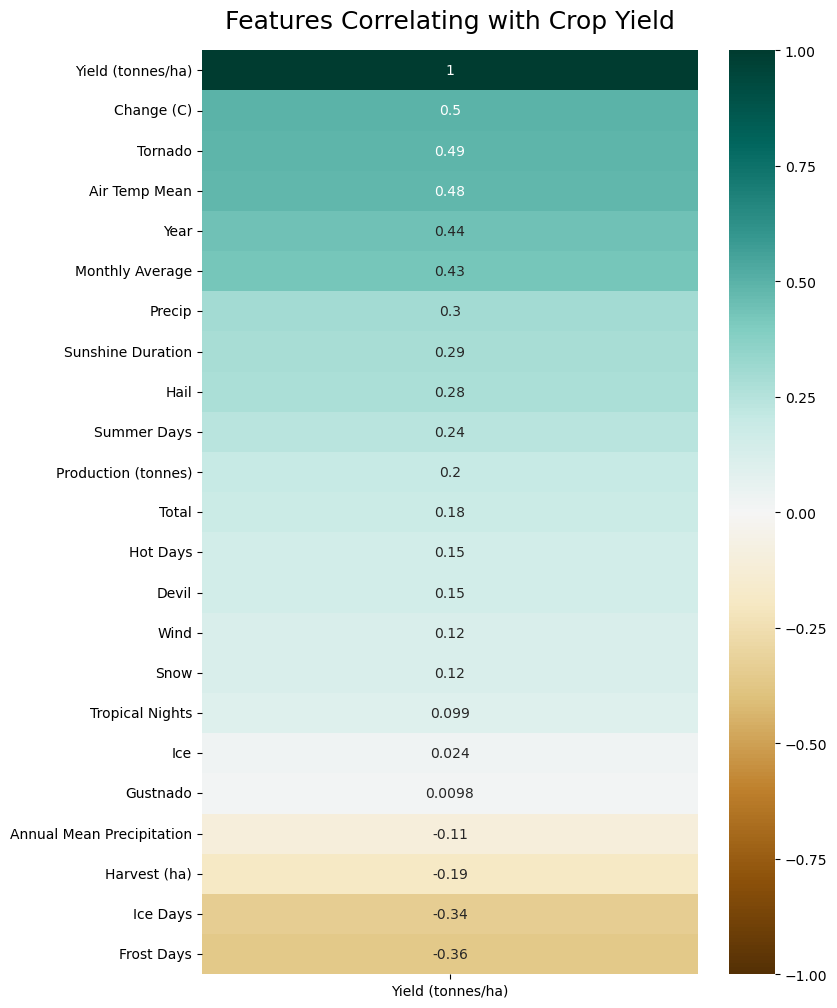

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(appl.corr()[['Yield (tonnes/ha)']].sort_values(by='Yield (tonnes/ha)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Crop Yield', fontdict={'fontsize':18}, pad=16);